In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.linear_model import LinearRegression

### Считаем данные из файла

In [27]:
data = pd.read_csv("data/lab3/data.csv", index_col="Магазин")
data.head()

,Площадь,Годовые продажи
Магазин,,
1,1.7,3.7
2,1.6,3.9
3,2.8,6.7
4,5.6,9.5
5,1.3,3.4


### №1 Построи поле корреляции.

Text(0.5, 1.0, 'Поле корреляции')

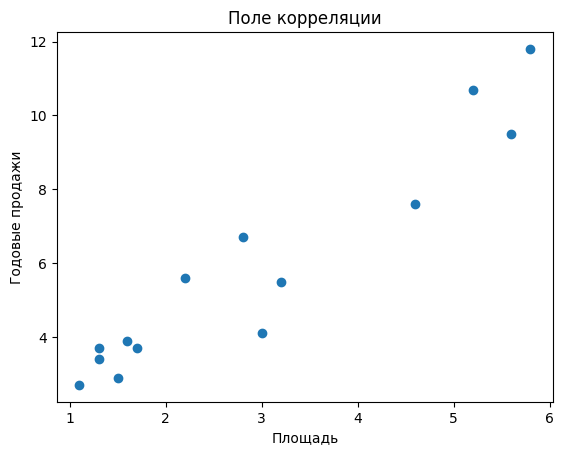

In [28]:
plt.scatter(x=data["Площадь"], y=data["Годовые продажи"])
plt.xlabel("Площадь")
plt.ylabel("Годовые продажи")
plt.title("Поле корреляции")

## №2  Рассчитайте параметры уравнений линейной, степенной, экспоненциальной, обратной, гиперболической парной регрессии.

In [29]:
data["xy"] = data["Годовые продажи"] * data["Площадь"]
data["x^2"] = data["Площадь"] ** 2
data["y^2"] = data["Годовые продажи"] ** 2
data.head()

,Площадь,Годовые продажи,xy,x^2,y^2
Магазин,,,,,
1,1.7,3.7,6.29,2.89,13.69
2,1.6,3.9,6.24,2.56,15.21
3,2.8,6.7,18.76,7.84,44.89
4,5.6,9.5,53.20,31.36,90.25
5,1.3,3.4,4.42,1.69,11.56


In [30]:
print(f"Среднее значение Площади : {data["Площадь"].mean()}")
print(f"Среднее значение Годовых продаж : {data["Годовые продажи"].mean()}")
print(f"Среднее по xy: {data["xy"].mean()}")
print(f"Сренее по x^2: {data["x^2"].mean()}")
print(f"Размер выборки: {len(data)}")

Среднее значение Площади : 2.9214285714285713
Среднее значение Годовых продаж : 5.842857142857142
Среднее по xy: 21.592857142857138
Сренее по x^2: 11.243571428571428
Размер выборки: 14


### №3 Найдите значения выборочных дисперсий и средних квадратических отклонений

In [31]:
print(
    f"Средне выборочное отконение Площади: { math.sqrt(data["x^2"].mean()-data["Площадь"].mean()**2)}"
)
std_x = math.sqrt(data["x^2"].mean() - data["Площадь"].mean() ** 2)
print(
    f"Средне выборочное отконение Годовых продаж : {math.sqrt(data["y^2"].mean()-data["Годовые продажи"].mean()**2)}"
)
std_y = math.sqrt(data["y^2"].mean() - data["Годовые продажи"].mean() ** 2)
print(f"Выборочная дисперсия Площади: {data["x^2"].mean()-data["Площадь"].mean()**2}")
print(
    f"Выборочная дисперсия Годовых продаж : {data["y^2"].mean()-data["Годовые продажи"].mean()**2}"
)
print(
    f"Значение средне выборочного отконения Площади через встроенную функцию : {data["Площадь"].std()}"
)
print(
    f"Значение средне выборочного отконения Годовых продаж через встроенную функцию : {data["Годовые продажи"].std()}"
)
print(
    f"Значение выборочной дисперсия Площади через встроенную функцию : {data["Площадь"].var()}"
)
print(
    f"Значение выборочной дисперсия Годовых продаж через встроенную функцию : {data["Годовые продажи"].var()}"
)

Средне выборочное отконение Площади: 1.6458513087798199
Средне выборочное отконение Годовых продаж : 2.8903075184174463
Выборочная дисперсия Площади: 2.708826530612246
Выборочная дисперсия Годовых продаж : 8.353877551020418
Значение средне выборочного отконения Площади через встроенную функцию : 1.7079806211423485
Значение средне выборочного отконения Годовых продаж через встроенную функцию : 2.9994138621543236
Значение выборочной дисперсия Площади через встроенную функцию : 2.9171978021978022
Значение выборочной дисперсия Годовых продаж через встроенную функцию : 8.996483516483515


### Найдите выборочный коэффициент ковариации

In [32]:
cov_x_y = data["xy"].mean()-data["Годовые продажи"].mean()*data["Площадь"].mean()
print(
    f"Коварация через встроенную функцию: {np.cov(data["Площадь"], data["Годовые продажи"])[0][1]}"
)
print(
    f"Коварация {data["xy"].mean()-data["Годовые продажи"].mean()*data["Площадь"].mean()}"
)

Коварация через встроенную функцию: 4.871318681318682
Коварация 4.523367346938777


## По исходным данным рассчитайте коэффициенты уравнения регрессии a и b

In [33]:
b = (data["xy"].mean() - data["Годовые продажи"].mean() * data["Площадь"].mean()) / (
    data["x^2"].mean() - data["Площадь"].mean() ** 2
)
a = data["Годовые продажи"].mean() - b * data["Площадь"].mean()

print(f"Коэффециент a : {a}")
print(f"Кэффециент b : {b}")

Коэффециент a : 0.9644736594277958
Кэффециент b : 1.6698623170662799


In [34]:
lin_reg = LinearRegression()
X = pd.DataFrame(data["Площадь"])
X["free"] = 1
lin_reg.fit(X, data["Годовые продажи"])
print(f"Коэфиценты встроенной регрессии: {lin_reg.coef_}")

Коэфиценты встроенной регрессии: [1.66986232 0.        ]


### Вывод

С увеличением площади магазина на 100 м^2, годовой доход вырастет на 166 у.е.

### №4 Оцените тесноту связи с помощью показателей корреляции и детерминации

In [35]:
cor_x_y = cov_x_y / (std_x * std_y)
print(f"Корреляция Площади и Годовых продаж: {cor_x_y}")

Корреляция Площади и Годовых продаж: 0.9508832753998657


По шкале Чеддока теснота связи: Весьма высокая.

In [36]:
def my_regression(x: np.float64) -> float:
    return x * b + a

In [37]:
r_square = sum(
    (data["Площадь"].apply(my_regression) - data["Годовые продажи"].mean()) ** 2
) / sum((data["Годовые продажи"] - data["Годовые продажи"].mean()) ** 2)
print(f"R^2: {r_square}")
print(f"Коэффициент корреляции в квадрате: {cor_x_y**2}")

R^2: 0.9041790034351774
Коэффициент корреляции в квадрате: 0.9041790034351769


In [38]:
print(
    f"Коэффициент корреляции через встроенные функции: {data.corr()["Площадь"]["Годовые продажи"]}"
)
print(
    f"Коэффициент корреляции Пирсона через встроенную функцию: {data.corr()["Площадь"]["Годовые продажи"]**2} "
)

Коэффициент корреляции через встроенные функции: 0.9508832753998661
Коэффициент корреляции Пирсона через встроенную функцию: 0.9041790034351775 


### Вывод

r = 0.9508832753998661-Связь весьма высокая, прямая. 

R^2 = 0.9041790034351774 - Вариация 90,42% 


### №5 Дайте с помощью коэффициента эластичности сравнительную оценку силы связи фактора с результатом

In [39]:
print(
    f"Коэфициент элластичности: {b*data["Площадь"].mean()/data["Годовые продажи"].mean()}"
)

Коэфициент элластичности: 0.83493115853314


### Вывод 
Результат y в среднем по совокупности вырастет на 0.8349% от своей средней величины при изменении фактора x на 1% от своего среднего значения.

### №6 Качество модели определяет средняя ошибка аппроксимации

In [40]:
data["y_counted"] = data["Площадь"].apply(my_regression)
data["y-y_counted"] = data["Годовые продажи"] - data["y_counted"]

In [41]:
mean_err_aproxim = (
    sum(abs(data["y-y_counted"] / data["Годовые продажи"])) * 100 / len(data)
)
print(f"Средняя ошибка аппроксимации: {mean_err_aproxim} %")

Средняя ошибка аппроксимации: 13.664906476507197 %


### Вывод

Для парной линейной регрессии: . В среднем расчетные значения отклоняются от фактических на 13,665%. Качество построенной модели оценивается как среднее.

### №7 Оцените статистическую надежность результатов регрессионного моделирования с помощью F-критерия Фишера

In [42]:
F_fact = r_square * (len(data) - 2) / (1 - r_square)
print(f"F-критерий Фишера фактический: {F_fact}")
print(f"Теоретическое значение из таблицы: 244")

F-критерий Фишера фактический: 113.23351280198847
Теоретическое значение из таблицы: 244


### Вывод

Так как F-теоретическое > F-fact гипотеза  не отклоняется и признается статистическая незначимость, ненадежность уравнений регрессии.

### №8 Оцените статистическую значимость коэффициентов регрессии на  уровне значимости a = 0,05

In [43]:
data["(y-y_counted)^2"] = data["y-y_counted"] ** 2
data["(x-x_mean)^2"] = (data["Площадь"] - data["Площадь"].mean()) ** 2

In [46]:
m_b = math.sqrt(
    sum(data["(y-y_counted)^2"]) / ((len(data) - 2) * sum(data["(x-x_mean)^2"]))
)
m_a = math.sqrt(
    sum(data["x^2"] * data["(y-y_counted)^2"] / data["(x-x_mean)^2"])
    / len(data)
    * (len(data) - 2)
)
m_r = math.sqrt((1 - cor_x_y**2) / (len(data) - 2))

In [48]:
t_b = b / m_b
t_a = a / m_a
t_r = cor_x_y / m_r
print(f"t_b: {t_b}")
print(f"t_a: {t_a}")
print(f"t_r: {t_r}")

t_b: 10.641123662564434
t_a: 0.013637523077392187
t_r: 10.64112366256439


In [63]:
t_table = 1.782288

### Вывод
t_table > t_a-Следует H0 то  не отклоняется и признается случайная природа формирования a.

t_table < t_b и t_table < t_r - то H0  отклоняется, т.е. b и rxy не случайно отличаются от нуля и сформировались под влиянием систематически действующего фактора x. 


### №9 Рассчитайте ожидаемое значение результата, если прогнозное значение фактора увеличится на 10% от его среднего уровня. Определите доверительный интервал прогноза для уровня значимости a = 0,05

In [58]:
x_p = data["Площадь"].mean() + 10 * data["Площадь"].mean() / 100
x_p

np.float64(3.2135714285714285)

In [66]:
y_p = my_regression(x_p)
y_p

np.float64(6.330695491200077)

In [53]:
std_ost = math.sqrt(sum(data["(y-y_counted)^2"]) / (len(data) - 1 - 1))

In [59]:
mean_std_err = std_ost * math.sqrt(
    1 + 1 / 1 + (x_p - data["Площадь"].mean()) ** 2 / sum(data["(x-x_mean)^2"])
)
mean_std_err

1.367435957597431

In [64]:
delta = t_table * mean_std_err

In [65]:
print(f"Доверительный при уровне значимости 0,05: {y_p-delta}<y_p*<{y_p+delta}")

Доверительынй при уровне значимости 0,05: 3.893530793205666<y_p*<8.767860189194487


### Пояснительная записка

- Исходя из корреляционного поля, можно сказать что между величинами "Площадь" и "Годовой доход" есть линейная зависимость.
- Между величинами "Площадь" и "Годовой доход", есть линейная зависимость, так как коэфициент корреляции близок к 1
- Линейная регрессия достаточно точно описывает поведение величин, так как ошибка апроксимации всего 13%
- Доверительный интервал для прогназируемого значения со значимостью 0,05, позволяет предположить, что значение попадет в интервал 3.893530793205666 < y_p < 8,767860189194487